In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import preprocessing

CLEAN DATA

In [13]:
df_clean = pd.read_csv('A2_data.csv')
df_clean = df_clean.drop('field_ID', axis=1) # the id column is not needed for estimation
df_clean = df_clean.drop('MJD', axis=1) # the MJD column is not needed for estimation
df_clean = df_clean.drop('plate', axis=1) # the plate column is not needed for estimation')

# drop row 79543
df_clean = df_clean.drop(79543, axis=0)

# transform classes to numbers
df_clean['class'] = df_clean['class'].map({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

df_x = df_clean.iloc[:,0:8]
df_y = df_clean['class']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scale the data
df_scaled = scaler.fit_transform(df_x)

# convert the scaled data to a dataframe
df_x = pd.DataFrame(df_scaled, columns=df_x.columns)


FINDING THE KEY PARAMETER

KERNELS

In [3]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)

SVM WITH POLY

In [23]:
poly_svc=SVC(kernel='poly', decision_function_shape='ovo')


poly_scores = cross_val_score(poly_svc, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with poly kernel:\n\n{}'.format(poly_scores))

# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with poly kernel:{:.4f}'.format(poly_scores.mean()))

Stratified cross-validation scores with poly kernel:

[0.681   0.7036  0.68555 0.6779  0.6754 ]
Average stratified cross-validation score with poly kernel:0.6847


SVM WITH RBF

In [24]:
rbf_svc=SVC(kernel='rbf', decision_function_shape='ovo')


rbf_scores = cross_val_score(rbf_svc, df_x, df_y, cv=kfold)

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.8049  0.80955 0.8031  0.80235 0.80345]
Average stratified cross-validation score with rbf kernel:0.8047


SVM WITH LINEAR

In [25]:
linear_svc=SVC(kernel='linear', decision_function_shape='ovo')


linear_scores = cross_val_score(linear_svc, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.7533  0.7524  0.7588  0.75185 0.75255]
Average stratified cross-validation score with linear kernel:0.7538


PARAMETER C 

RBF

In [24]:
# instantiate classifier with rbf kernel and C=1
svcRBF1=SVC(kernel = "rbf", C=1.0, decision_function_shape='ovo') 


RBF_scores = cross_val_score(svcRBF1, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(RBF_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(RBF_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.85505    0.85475    0.8515     0.8525     0.85314266]
Average stratified cross-validation score with rbf kernel:0.8534


In [25]:
# instantiate classifier with rbf kernel and C=100
svcRBF100=SVC(kernel = "rbf", C=100.0, decision_function_shape='ovo') 


RBF_scores = cross_val_score(svcRBF100, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(RBF_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(RBF_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.8747     0.87545    0.8738     0.876      0.87339367]
Average stratified cross-validation score with rbf kernel:0.8747


LINEAR

In [4]:
linear_svc1=SVC(kernel='linear', C=1.0, decision_function_shape='ovo') 


linear_scores = cross_val_score(linear_svc1, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.76985   0.76885   0.7716    0.77125   0.7700885]
Average stratified cross-validation score with linear kernel:0.7703


In [5]:
linear_svc100=SVC(kernel='linear', C=100.0, decision_function_shape='ovo') 


linear_scores = cross_val_score(linear_svc100, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.76995    0.76885    0.77175    0.77115    0.77023851]
Average stratified cross-validation score with linear kernel:0.7704


PARAMETER GAMMA

In [6]:
svc01=SVC(kernel = "rbf", gamma=0.1, decision_function_shape='ovo') 


rbf_scores = cross_val_score(svc01, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.8535     0.85235    0.84895    0.8498     0.85154258]
Average stratified cross-validation score with rbf kernel:0.8512


In [7]:
svc02=SVC(kernel = "rbf", gamma=0.2, decision_function_shape='ovo') 


rbf_scores = cross_val_score(svc02, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.85985    0.85885    0.85575    0.85805    0.85859293]
Average stratified cross-validation score with rbf kernel:0.8582


In [8]:
svc04=SVC(kernel = "rbf", gamma=0.4, decision_function_shape='ovo') 


rbf_scores = cross_val_score(svc04, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.86315    0.8627     0.85815    0.8608     0.86044302]
Average stratified cross-validation score with rbf kernel:0.8610


In [9]:
svc06=SVC(kernel = "rbf", gamma=0.6, decision_function_shape='ovo') 


rbf_scores = cross_val_score(svc06, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.8629     0.8623     0.8591     0.8608     0.86089304]
Average stratified cross-validation score with rbf kernel:0.8612


In [10]:
svc08=SVC(kernel = "rbf", gamma=0.8, decision_function_shape='ovo') 


rbf_scores = cross_val_score(svc08, df_x, df_y, cv=kfold)

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified cross-validation scores with rbf kernel:

[0.863      0.86195    0.85935    0.85995    0.86099305]
Average stratified cross-validation score with rbf kernel:0.8610


RANDOM SEARCH FOR HYPARAMETER OPTIMIZATION

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.model_selection import RandomizedSearchCV


svc=SVC()

#tuning using Random Search
hyperparameters = [ {'C':[100, 1000], 'kernel':['linear']},
                {'C':[100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.4, 0.8]},
                {'C':[100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01, 0.02, 0.05]} 
               ]


rf_random = RandomizedSearchCV(svc, hyperparameters, n_iter = 10, cv = 5, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=18.4min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=18.4min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=18.6min
[CV] END ..........C=1000, degree=3, gamma=0.05, kernel=poly; total time=19.9min
[CV] END ..........C=1000, degree=3, gamma=0.05, kernel=poly; total time=21.4min
[CV] END ..........C=1000, degree=3, gamma=0.05, kernel=poly; total time=21.9min
[CV] END ..........C=1000, degree=3, gamma=0.05, kernel=poly; total time=23.0min
[CV] END ..........C=1000, degree=3, gamma=0.05, kernel=poly; total time=23.0min
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time= 1.8min
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time= 2.0min
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time= 1.9min
[CV] END ...........C=100, degree=2, gamma=0.01,

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}

OVO VS OVR

In [21]:
svc=SVC(kernel = "rbf", C=1000.0, gamma=0.1, decision_function_shape='ovo') 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVO : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVO : 0.8773


In [16]:
svc2=SVC(kernel = "rbf", C=1000.0, gamma=0.1, decision_function_shape='ovr') 


# fit classifier to training set
svc2.fit(X_train,y_train)


# make predictions on test set
y_pred_2=svc2.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : {0:0.4f}'. format(accuracy_score(y_test, y_pred_2)))

Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : 0.8773


CONFUSION MATRIX - SVC(kernel='rbf', gamma=0.1, C=1000.0, decision_function_shape='ovr')

Text(50.722222222222214, 0.5, 'True')

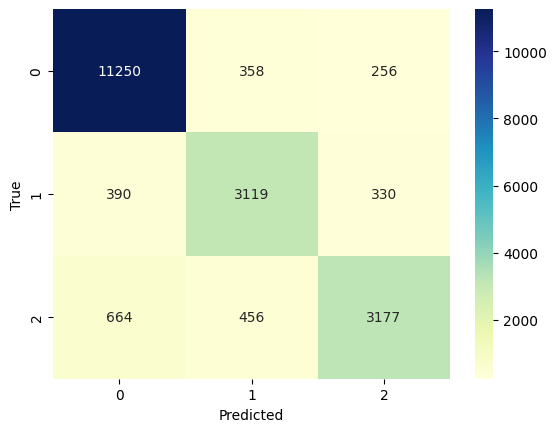

In [17]:
cm = confusion_matrix(y_test, y_pred_2)

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')

CLASSIFICATION REPORT - SVC(kernel='rbf', gamma=0.1, C=1000.0, decision_function_shape='ovr')

In [8]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93     11864
           2       0.79      0.81      0.80      3839
           3       0.84      0.74      0.79      4297

    accuracy                           0.88     20000
   macro avg       0.85      0.83      0.84     20000
weighted avg       0.88      0.88      0.88     20000



REDUCED DATA

PCA

In [11]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(df_x)
transformed_scaled = pca.transform(df_x)


transformed_pca = pd.DataFrame(transformed_scaled, columns=['PC1', 'PC2'])
transformed_pca

,PC1,PC2
0,-0.902578,0.008765
1,-2.981371,0.054978
2,-1.368684,0.173273
3,-1.703697,0.328896
4,3.602040,1.073680
...,...,...
99994,-2.230306,-1.940724
99995,-1.063393,-1.221326
99996,1.557219,0.016833
99997,-0.799520,1.079741


In [12]:
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = train_test_split(transformed_pca, df_y, test_size = 0.2, random_state = 0)

In [11]:
X_trainPCA.iloc[:,0]

10382   -0.053771
73171   -0.303468
30938    0.130101
99310    0.057507
58959   -0.326227
           ...   
21243   -0.074075
45891    0.322635
42613    0.329447
43567    0.299846
68268   -0.191566
Name: PC1, Length: 80000, dtype: float64

In [13]:
svcPCA=SVC(kernel = "rbf", C=1000.0, gamma=0.1, decision_function_shape='ovr') 


# fit classifier to training set
svcPCA.fit(X_trainPCA,y_trainPCA)


# make predictions on test set
y_pred_PCA=svcPCA.predict(X_testPCA)


# compute and print accuracy score
print('Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : {0:0.4f}'. format(accuracy_score(y_testPCA, y_pred_PCA)))

Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : 0.5980


TSNE

In [8]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

tsne = TSNE(n_components=2, perplexity=50)
transformed = tsne.fit_transform(df_x)

transformed_TSNE = pd.DataFrame(transformed, columns=['TSNE1', 'TSNE2'])
transformed_TSNE = preprocessing.scale(transformed_TSNE)

/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [9]:
X_trainTSNE, X_testTSNE, y_trainTSNE, y_testTSNE = train_test_split(transformed_TSNE, df_y, test_size = 0.2, random_state = 0)

In [10]:
svcTSNE=SVC(kernel = "rbf", C=1000.0, gamma=0.1, decision_function_shape='ovr') 


# fit classifier to training set
svcTSNE.fit(X_trainTSNE,y_trainTSNE)


# make predictions on test set
y_pred_TSNE=svcTSNE.predict(X_testTSNE)


# compute and print accuracy score
print('Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : {0:0.4f}'. format(accuracy_score(y_testTSNE, y_pred_TSNE)))

Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : 0.6993


UMAP

In [5]:
import umap

umap = umap.UMAP(n_components=2)
transformed = umap.fit_transform(df_x)


transformed_UMAP = pd.DataFrame(transformed, columns=['UMAP1', 'UMAP2'])
transformed_UMAP
transformed_UMAP = preprocessing.scale(transformed_UMAP)

/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [6]:
X_trainUMAP, X_testUMAP, y_trainUMAP, y_testUMAP = train_test_split(transformed_UMAP, df_y, test_size = 0.2, random_state = 0)

In [7]:
svcUMAP=SVC(kernel = "rbf", C=1000.0, gamma=0.1, decision_function_shape='ovr') 


# fit classifier to training set
svcUMAP.fit(X_trainUMAP,y_trainUMAP)


# make predictions on test set
y_pred_UMAP=svcUMAP.predict(X_testUMAP)


# compute and print accuracy score
print('Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : {0:0.4f}'. format(accuracy_score(y_testUMAP, y_pred_UMAP)))

Model accuracy score with rbf kernel, C=1000.0 and gamma=0.1 - OVR : 0.7255


In [19]:
import warnings
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


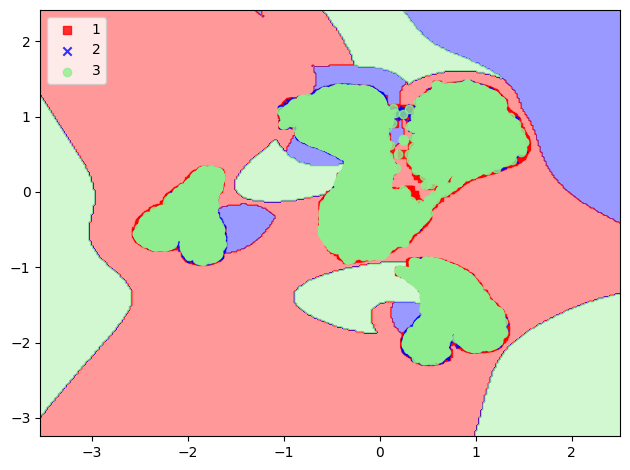

In [20]:
# Visualize the decision boundaries
plot_decision_regions(transformed_UMAP, df_y, classifier=svcUMAP)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary - SVM (UMAP reduced data)')
plt.show()